## <b>Assignment on Improving Performance of Classifier Models</b>
A SMS unsolicited mail (every now and then known as cell smartphone junk mail) is any junk 
message brought to a cellular phone as textual content messaging via the Short Message Service 
(SMS). Use probabilistic approach (Naive Bayes Classifier / Bayesian Network) to implement 
SMS Spam Filtering system. SMS messages are categorized as SPAM or HAM using features 
like length of message, word depend, unique keywords etc.
#
<i>Download Data -Set from: http://archive.ics.uci.edu/ml/datasets/sms+spam+collection</i>

This dataset is composed by just one text file, where each line has the correct class followed by
the raw message.
* Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if
necessary.
* Perform data-preparation (Train-Test Split)
* Apply at least two Machine Learning Algorithms and Evaluate Models
* Apply Cross-Validation and Evaluate Models and compare performance.
* Apply hyper parameter tuning and evaluate models and compare performance

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# df=pd.read_csv('./SMSSpamCollection.csv')
df=pd.read_table('./Dataset/SMSSpamCollection')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isna().sum().sum()

0

In [5]:
df.duplicated().sum()

403

In [6]:
df=df.drop_duplicates()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df['type']=LabelEncoder().fit_transform(df['type'])
df.head()

,type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


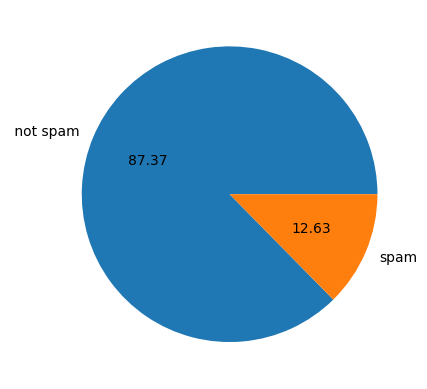

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
value_count=df['type'].value_counts()
plt.pie(value_count,labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JOJO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df['num_characters']=df['message'].apply(len)
df.head()

,type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [12]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [13]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [14]:
df[df['type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
df[df['type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOJO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [19]:
def text_transform(message):
    message=message.lower() 
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [20]:
df['transformed_msg']=df['message'].apply(text_transform)

In [21]:
df.head()

,type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [22]:
# from wordcloud import WordCloud
# wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
# spam_wc=wc.generate(df[df['type']==1]['transformed_msg'].str.cat(sep=""))
# plt.figure(figsize=(18,12))
# plt.imshow(spam_wc)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

gnb = GaussianNB()
bnb = BernoulliNB()

In [25]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred1))
print('Precision score : ',precision_score(y_test,y_pred1))

Accuracy :  0.8646034816247582
Precision score :  0.46846846846846846


In [26]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred1))

Confusion Matrix
[[790 118]
 [ 22 104]]


In [27]:
bnb.fit(X_train,y_train)
y_pred2= bnb.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred2))
print('Precision score : ',precision_score(y_test,y_pred2))

Accuracy :  0.9796905222437138
Precision score :  0.981651376146789


In [28]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred2))

Confusion Matrix
[[906   2]
 [ 19 107]]
